In [1]:
import lightkurve as lk
import numpy as np

ModuleNotFoundError: No module named 'lightkurve'

In [2]:
import lightkurve as lk
import numpy as np

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
tpf = lk.search_targetpixelfile("KIC 2437317", author="Kepler", cadence="long", quarter=10).download(quality_bitmask="hard") #Aperture photometry

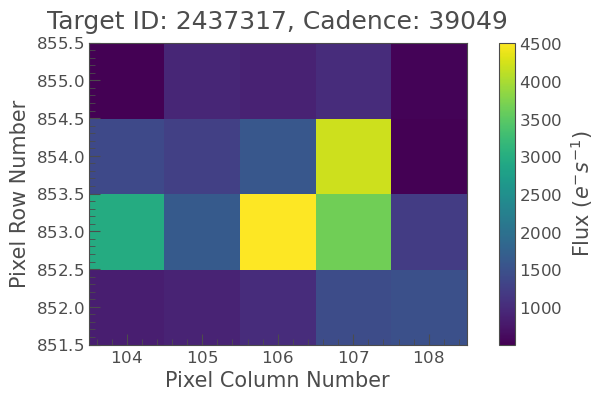

In [11]:
tpf.plot();

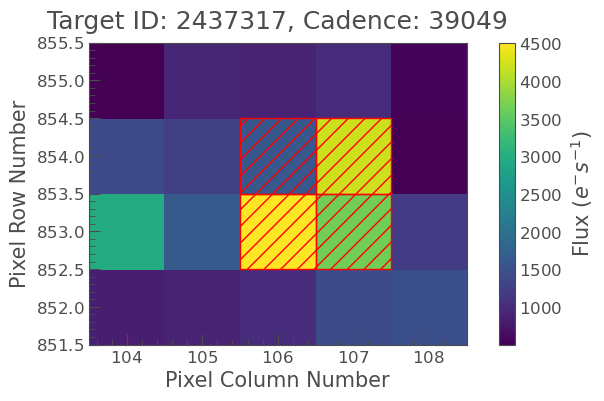

In [12]:
tpf.plot(aperture_mask='pipeline'); #applied pipeline aperture to tpf

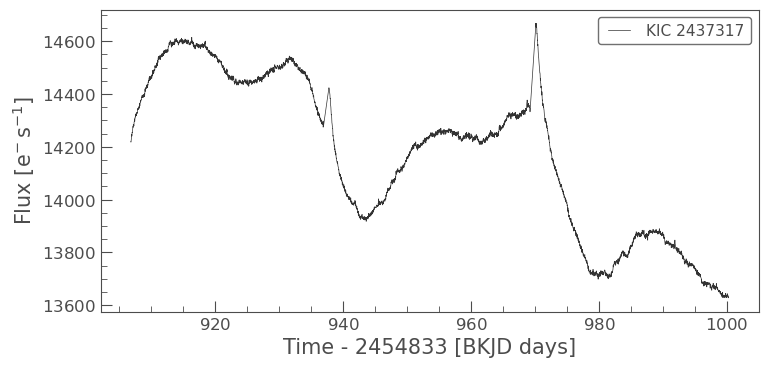

In [13]:
lc = tpf.to_lightcurve(aperture_mask="pipeline") #used to_lightcurve method to convert tpf postage image to lightcurve
lc.plot();

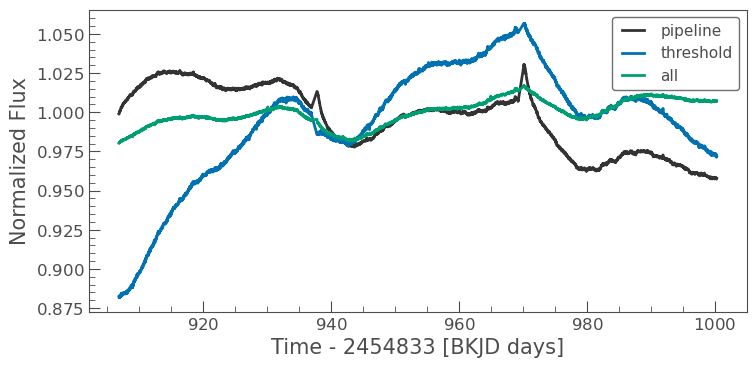

In [14]:
#trying plotting lightcurve with different aperture masks and plotting them on same curve for better comparative analysis
ax = tpf.to_lightcurve(aperture_mask='pipeline').normalize().plot(label='pipeline', linewidth=2);
tpf.to_lightcurve(aperture_mask='threshold').normalize().plot(ax=ax, label='threshold', linewidth=2);
tpf.to_lightcurve(aperture_mask='all').normalize().plot(ax=ax, label='all', linewidth=2);

In [15]:
custom_threshold_mask = tpf.create_threshold_mask(threshold=1) #practicing custom aperture photometry by creating our own threshold mask,governed by threshold keyword
custom_threshold_mask

array([[False, False, False, False, False],
       [False, False,  True,  True, False],
       [False, False,  True,  True, False],
       [False, False, False, False, False]])

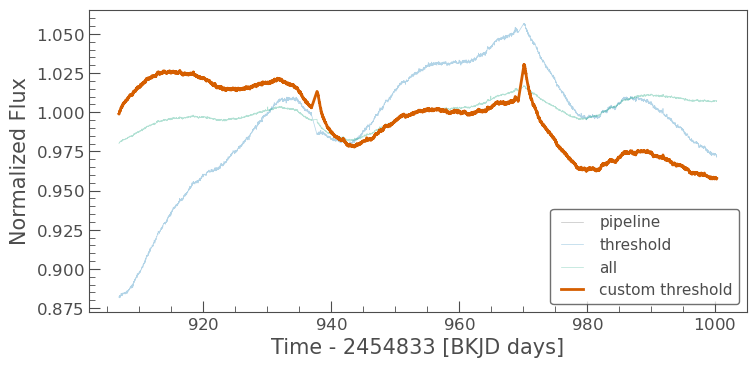

In [16]:
ax = tpf.to_lightcurve(aperture_mask='pipeline').normalize().plot(label='pipeline', alpha=.3)
tpf.to_lightcurve(aperture_mask='threshold').normalize().plot(ax=ax, label='threshold', alpha=.3)
tpf.to_lightcurve(aperture_mask='all').normalize().plot(ax=ax, label='all', alpha=.3)
tpf.to_lightcurve(aperture_mask=custom_threshold_mask).normalize().plot(ax=ax, label='custom threshold', linewidth=2);

In [36]:
custom_mask = np.zeros((tpf[0].shape[1:]), dtype='bool')
custom_mask[-2,1]= True
custom_mask[0,3:]= True
custom_mask[1:3,2:4]= True
custom_mask

array([[False, False, False,  True,  True],
       [False, False,  True,  True, False],
       [False,  True,  True,  True, False],
       [False, False, False, False, False]])

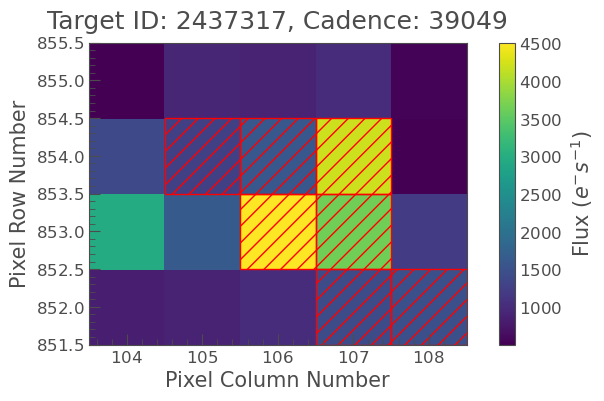

In [37]:
tpf.plot(aperture_mask=custom_mask);